## Useful references

### Refs
- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- [YouTube Tutorial](https://www.youtube.com/watch?v=NozaWUkJ3YM)

### Workflow Suggestions
> After modifying classes from `src` directory, **Restart NoteBook Kernel** is required 
- Recommended action after changing files in `src`: Restart -> Run All

## Imports

In [1]:
from collections import Counter

from src import DIAMAG_COMPOUND_ATOMS_SUBDIR
from src.constants.bond_types import RELEVANT_BOND_TYPES
from src.core.bond_match import (
    BondMatchCandidate,
    MBSubstructMatcher,
    SubstructMatchResult,
)
from src.core.compound import MBCompound
from src.loader import MBLoader, MBMolecule
from src.utils.renderer import Renderer
from src.utils.ui import Theme
from tests.core.bond_match.substruct_matcher_test_data import BOND_MATCH_TEST_CASES


## Filter specific test

In [2]:
filter_test_id = 8  # set to None for all tests

## Find substructure matches test
> - Identical as **test_substruct_matcher.py**, but allows to **visualize** specific test case

In [3]:
failures: list[str] = []
mols: list[MBMolecule] = []
results: list[SubstructMatchResult] = []

for idx, bond_type_test in enumerate(
    BOND_MATCH_TEST_CASES
    if filter_test_id is None
    else BOND_MATCH_TEST_CASES[filter_test_id : filter_test_id + 1]
):
    mol: MBMolecule = MBLoader.MolFromSmiles(smiles=bond_type_test.SMILES)
    mols.append(mol)

    results.append(MBSubstructMatcher.GetMatches(mol=mol))

## Visual Representation

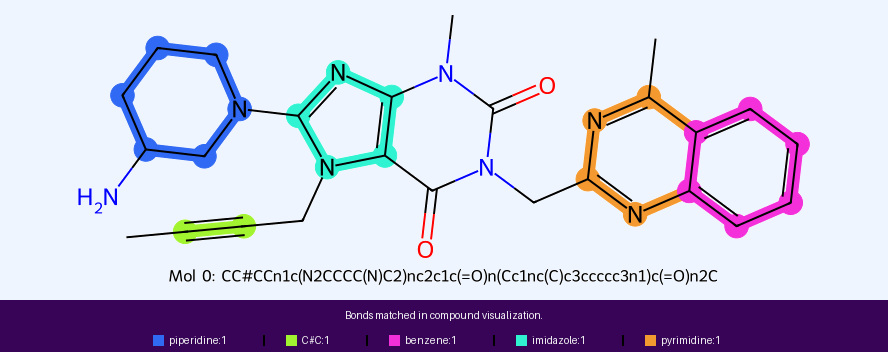

In [4]:
display(
    Renderer(Theme.LoFi).GetMoleculesGridImg(
        mols=[m.ToRDKit() for m in mols],
        highlightAtomLists=[r.highlightAtomList for r in results],
        highlightAtomGroupsPerMol=[r.highlightAtomGroups for r in results],
        matchesCountersPerMol=[r.matchesCounter for r in results],
        size=(888, 300),
        mols_per_row=1,
        label="Bonds matched in compound visualization.",
        showLegend=True,
    )
)